# Statistical analysis of ukbiobank project

In [3]:
setwd('C:/Users/sb199/Projet3_data/')
data<-read.csv(file = 'data_ukbiobank.csv')
head(data)

Subject,Sex,Height,Weight,Intracranial.volume,Age,T1w_CSA,T2w_CSA
1000032,0,156,63.4,960606,71,46.74229,2.087007
1000083,1,171,66.1,1114890,71,45.00229,43.621736
1000252,1,173,85.7,1253180,75,55.97319,57.276836
1000394,1,180,80.9,1427490,70,49.93978,47.767867
1000498,0,160,50.9,1083670,58,39.67688,42.768688
1000537,0,162,59.8,1018880,77,51.97979,49.908099


In [4]:
T1w_CSA <- data$T1w_CSA
T2w_CSA <- data$T2w_CSA
sex <- data$Sex
height <- data$Height
weight <-data$Weight
intracranial.volume <- data$Intracranial.volume
age <- data$Age

## Validation of normal distribution of CSA

Validation of the hypothesis that CSA follows a normal distribution


	Shapiro-Wilk normality test

data:  T1w_CSA
W = 0.97456, p-value = 0.9296


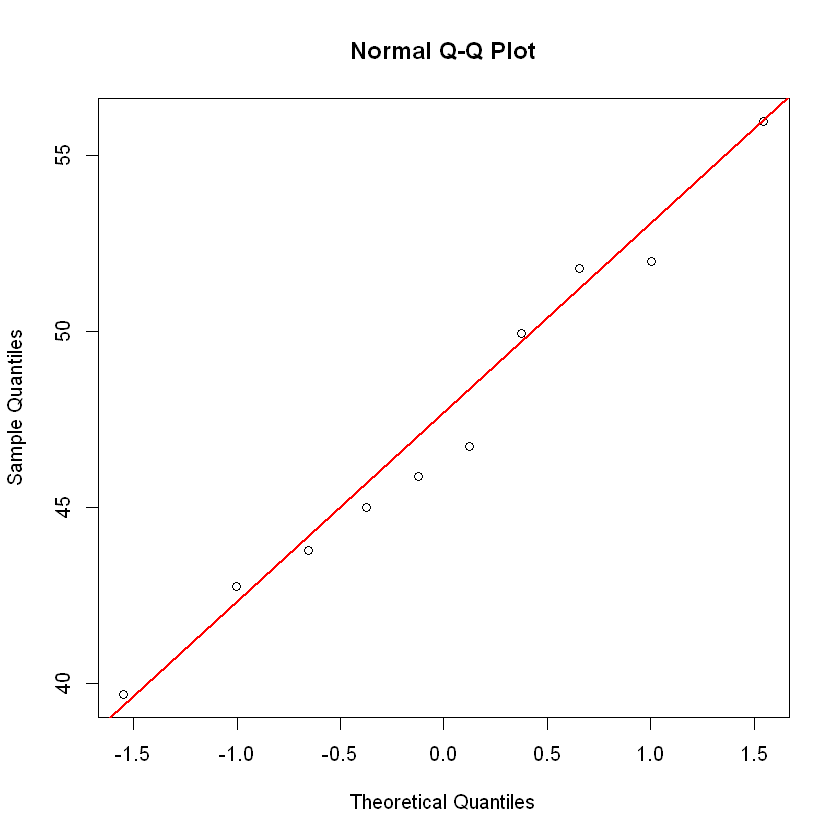

In [5]:
#Q-Q plot for T1w CSA
qqnorm(T1w_CSA)
qqline(T1w_CSA, col="red", lwd=2)
#Shapiro wilik normlaity test
shapiro.test(T1w_CSA)


	Shapiro-Wilk normality test

data:  T2w_CSA
W = 0.65487, p-value = 0.0002512


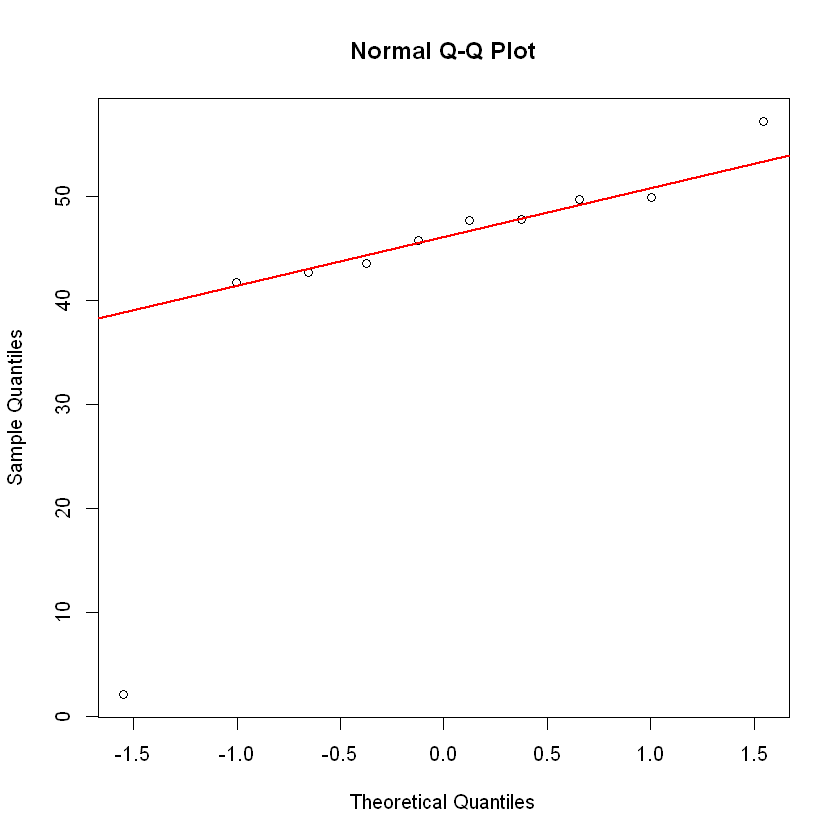

In [6]:
#Q-Q plot for T2w CSA
qqnorm(T2w_CSA)
qqline(T2w_CSA, col="red", lwd=2)
#Shapiro wilik normlaity test
shapiro.test(T2w_CSA)

## Metrics of CSA

In [7]:
summary = summary(data)
metrics_CSA = data.frame(
    Metrics=c("T1w_CSA", "T2w_CSA"),
    number_of_subjects = NA,
    mean=NA, 
    std=NA,
    med=NA,
    COV=NA,
    max= NA,
    min= NA,
    ci95 = NA)

In [8]:
metrics_CSA$number_of_subjects = c(length(T1w_CSA), length(T2w_CSA))
#mean
metrics_CSA$mean = c(mean(T1w_CSA), mean(T2w_CSA))
#std
metrics_CSA$std = c(sd(T1w_CSA),sd(T2w_CSA))
#mediane
metrics_CSA$med = c(median(T1w_CSA),median(T2w_CSA))
#COV
metrics_CSA$COV = c(sd(T1w_CSA)/mean((T1w_CSA)),sd(T2w_CSA)/mean(T2w_CSA))
#Max
metrics_CSA$max = c(max(T1w_CSA),max(T2w_CSA))
#Min
metrics_CSA$min = c(min(T1w_CSA),min(T2w_CSA))
# 95% confidence interval
t_T1w = t.test(T1w_CSA)
t_T2w = t.test(T1w_CSA)
metrics_CSA$ci95 = c(t_T1w$conf.int[1], t_T2w$conf.int[1])

In [9]:
metrics_CSA

Metrics,number_of_subjects,mean,std,med,COV,max,min,ci95
T1w_CSA,10,47.35035,4.977934,46.30958,0.1051298,55.97319,39.676876,43.78935
T2w_CSA,10,42.85756,15.005904,46.77737,0.3501343,57.27684,2.087007,43.78935


In [10]:
metrics_predictors = data.frame(
    Predictor =c("Height", "Weight", 'Intracranial.volume', 'Age'),
    mean= NA,
    med=NA,
    max= NA,
    min= NA)

#sapply(data[3:6], mean)
metrics_predictors$mean = sapply(data[3:6], mean)[1:4]
metrics_predictors$med = sapply(data[3:6], median)[1:4]
metrics_predictors$min =  sapply(data[3:6], min)[1:4]
metrics_predictors$max =  sapply(data[3:6], max)[1:4]

metrics_predictors

Predictor,mean,med,max,min
Height,166.50,166.50,180.0,151.0
Weight,70.64,71.85,85.7,50.9
Intracranial.volume,1106706.90,1099280.00,1427490.0,893723.0
Age,71.80,71.50,82.0,58.0


## Test of mean equality of T1w and T2w CSA

In [11]:
t.test( T1w_CSA, T1w_CSA, alternative = "two.sided")


	Welch Two Sample t-test

data:  T1w_CSA and T1w_CSA
t = 0, df = 18, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.677072  4.677072
sample estimates:
mean of x mean of y 
 47.35035  47.35035 


on ne rejette pas l'hypothèse nulle que la différence entre les moyennes est nulle

## Correlation matrix

In [12]:
cor(data)

,Subject,Sex,Height,Weight,Intracranial.volume,Age,T1w_CSA,T2w_CSA
Subject,1.00000000,-0.3392662,0.1600418,0.1585228,-0.25568500,0.17160222,-0.04530331,0.3921527
Sex,-0.33926616,1.0000000,0.7396199,0.5123925,0.72888452,-0.19774527,0.22833577,0.3301216
Height,0.16004182,0.7396199,1.0000000,0.4077371,0.60750271,-0.17817186,0.39868494,0.4376355
Weight,0.15852281,0.5123925,0.4077371,1.0000000,0.42072962,0.38775207,0.41758824,0.3427538
Intracranial.volume,-0.25568500,0.7288845,0.6075027,0.4207296,1.00000000,-0.05783164,0.36412527,0.4428448
Age,0.17160222,-0.1977453,-0.1781719,0.3877521,-0.05783164,1.00000000,0.61783946,0.1902871
T1w_CSA,-0.04530331,0.2283358,0.3986849,0.4175882,0.36412527,0.61783946,1.00000000,0.3142490
T2w_CSA,0.39215267,0.3301216,0.4376355,0.3427538,0.44284485,0.19028713,0.31424902,1.0000000


## Multivariate model

In [13]:
model_t1 = lm(T1w_CSA~sex+height+weight+intracranial.volume+ age)
model_t2 = lm(T2w_CSA~sex+height+weight+intracranial.volume+ age)
summary(model_t1)
anova(model_t1)
summary(model_t2)
anova(model_t2)


Call:
lm(formula = T1w_CSA ~ sex + height + weight + intracranial.volume + 
    age)

Residuals:
      1       2       3       4       5       6       7       8       9      10 
 2.8563 -2.7869  5.5755 -1.0997  0.3178  2.5170 -3.3607 -1.6890 -1.2888 -1.0415 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)
(Intercept)         -4.077e+01  3.882e+01  -1.050    0.353
sex                 -1.089e+00  5.272e+00  -0.207    0.846
height               2.695e-01  2.157e-01   1.250    0.280
weight              -5.838e-02  1.882e-01  -0.310    0.772
intracranial.volume  7.179e-06  1.392e-05   0.516    0.633
age                  5.552e-01  2.649e-01   2.096    0.104

Residual standard error: 4.229 on 4 degrees of freedom
Multiple R-squared:  0.6792,	Adjusted R-squared:  0.2781 
F-statistic: 1.694 on 5 and 4 DF,  p-value: 0.315


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
sex,1,11.62756,11.62756,0.6500345,0.4653029
height,1,26.00106,26.00106,1.4535794,0.2943948
weight,1,24.79773,24.79773,1.3863078,0.3043024
intracranial.volume,1,10.47153,10.47153,0.5854069,0.4868496
age,1,78.57013,78.57013,4.3924334,0.1041445
Residuals,4,71.55044,17.88761,NA,NA



Call:
lm(formula = T2w_CSA ~ sex + height + weight + intracranial.volume + 
    age)

Residuals:
      1       2       3       4       5       6       7       8       9      10 
-30.968   1.684   6.266 -10.243  10.685   8.675   5.972   2.292   6.841  -1.205 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)
(Intercept)         -1.304e+02  1.708e+02  -0.764    0.488
sex                 -5.216e+00  2.319e+01  -0.225    0.833
height               5.918e-01  9.487e-01   0.624    0.567
weight               7.097e-02  8.279e-01   0.086    0.936
intracranial.volume  3.261e-05  6.123e-05   0.533    0.623
age                  4.972e-01  1.165e+00   0.427    0.692

Residual standard error: 18.61 on 4 degrees of freedom
Multiple R-squared:  0.3168,	Adjusted R-squared:  -0.5372 
F-statistic: 0.3709 on 5 and 4 DF,  p-value: 0.847


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
sex,1,220.85886,220.85886,0.6380466,0.4691598
height,1,167.46968,167.46968,0.4838088,0.5249969
weight,1,71.69192,71.69192,0.2071132,0.6726463
intracranial.volume,1,118.97410,118.97410,0.3437082,0.5891841
age,1,63.00576,63.00576,0.1820194,0.6916030
Residuals,4,1384.59404,346.14851,NA,NA


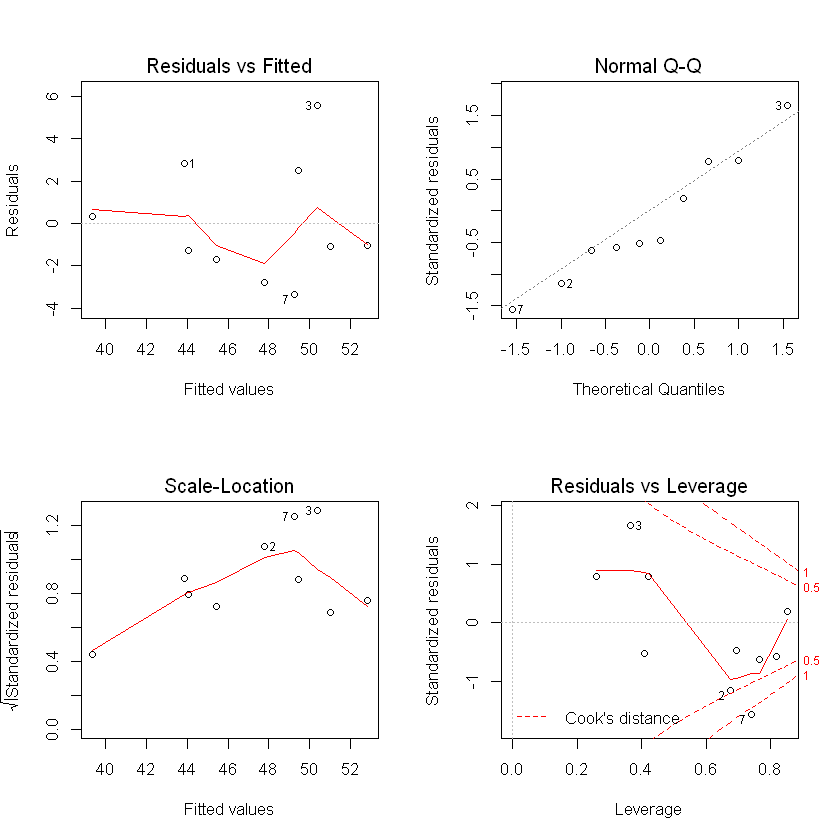

In [14]:
par(mfrow=c(2,2))
plot(model_t1)


## Stepwise linear regression

In [15]:
step(model_t1, direction="both", trace=0)

step(model_t2, direction="both", trace=0)


Call:
lm(formula = T1w_CSA ~ height + age)

Coefficients:
(Intercept)       height          age  
   -34.3730       0.2644       0.5250  



Call:
lm(formula = T2w_CSA ~ height)

Coefficients:
(Intercept)       height  
   -67.6891       0.6639  


In [16]:
model_t1_step = lm(T1w_CSA~ height + age)
model_t2_step = lm(T2w_CSA~ height)

In [17]:
summary(model_t1_step)
anova(model_t1_step)
summary(model_t2_step)
anova(model_t2_step)


Call:
lm(formula = T1w_CSA ~ height + age)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1181 -2.6780 -0.4211  2.2640  5.2240 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -34.3730    24.3299  -1.413   0.2006  
height        0.2644     0.1145   2.309   0.0543 .
age           0.5250     0.1679   3.127   0.0167 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.344 on 7 degrees of freedom
Multiple R-squared:  0.6491,	Adjusted R-squared:  0.5488 
F-statistic: 6.473 on 2 and 7 DF,  p-value: 0.02561


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
height,1,35.44871,35.44871,3.170437,0.11819603
age,1,109.30263,109.30263,9.775733,0.01668849
Residuals,7,78.26711,11.18102,NA,NA



Call:
lm(formula = T2w_CSA ~ height)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.799  -3.090   1.932   8.585  15.220 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -67.6891    80.4285  -0.842    0.424
height        0.6639     0.4823   1.377    0.206

Residual standard error: 14.31 on 8 degrees of freedom
Multiple R-squared:  0.1915,	Adjusted R-squared:  0.09047 
F-statistic: 1.895 on 1 and 8 DF,  p-value: 0.2059


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
height,1,388.1431,388.1431,1.895171,0.2059153
Residuals,8,1638.4512,204.8064,NA,NA


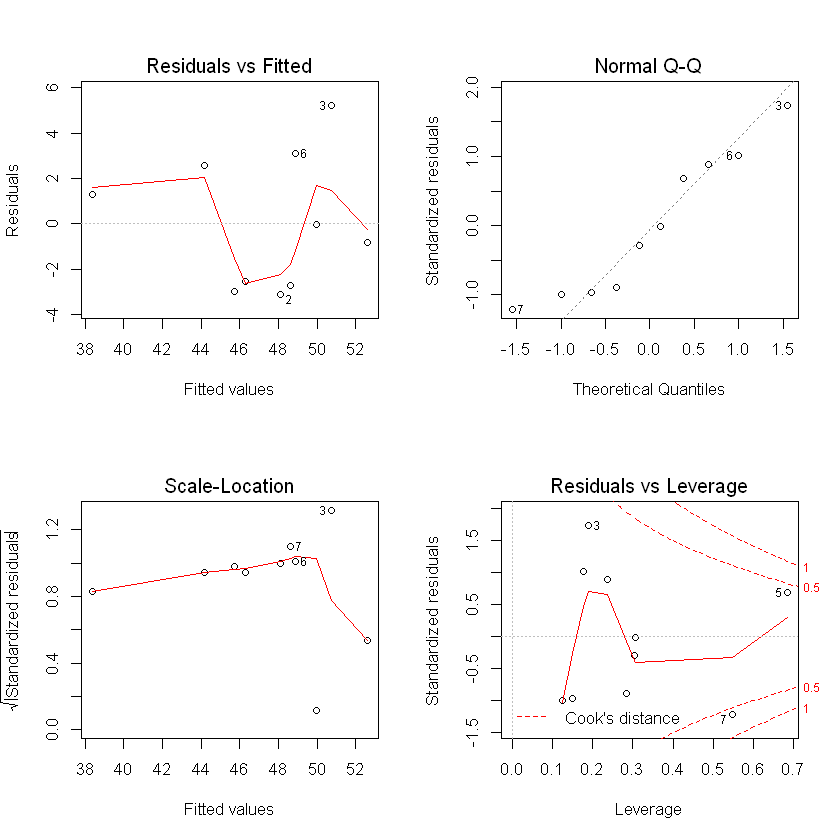

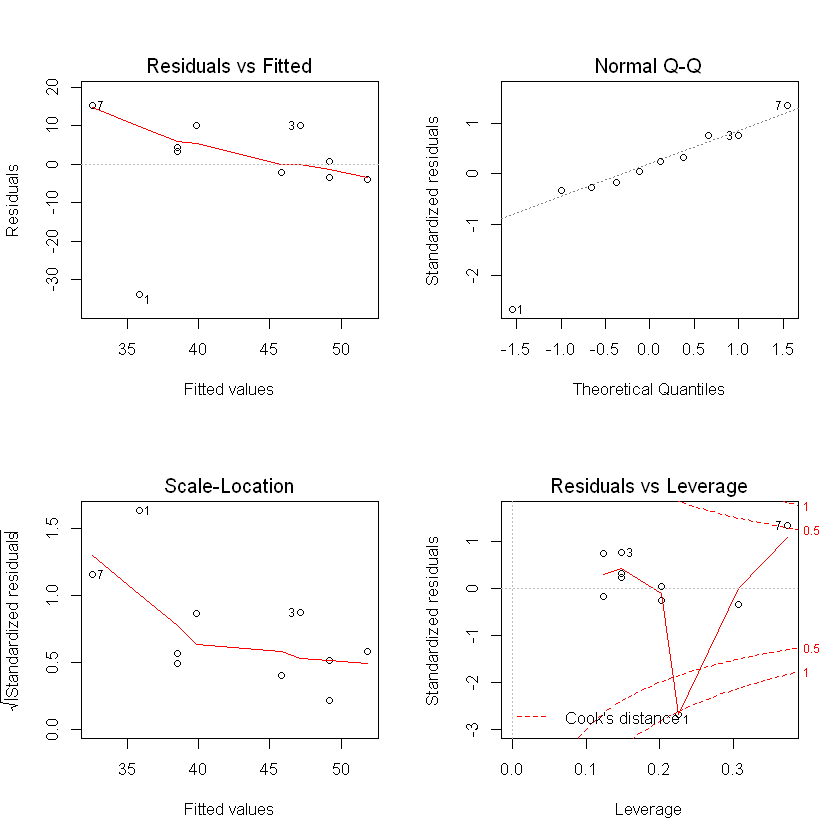

In [18]:
par(mfrow=c(2,2))
plot(model_t1_step)
par(mfrow=c(2,2))
plot(model_t2_step)